In [6]:
from pandas import read_csv
import os
import pandas as pd

In [33]:
os.chdir('C:/Users/arielxxd/Documents/GitHub/py_for_engineers') # access to the file directory 
sample_emission_df = read_csv('sample.csv', sep = ',') # load data as data frame
print sample_emission_df.head() # print top 5 rows

   OpModeID  pollutantID  sourceTypeID  fuelTypeID  modelYearID  emissionQuant
0         0           90            42           2         2017       18192.50
1         1           90            42           2         2017        9065.73
2        11           90            42           2         2017       11845.50
3        12           90            42           2         2017       33361.00
4        13           90            42           2         2017       58868.60


In [34]:
# Query data from dataframe, check the difference between iloc and loc here: https://pandas.pydata.org/pandas-docs/stable/indexing.html
print sample_emission_df.loc[1]

OpModeID            1.00
pollutantID        90.00
sourceTypeID       42.00
fuelTypeID          2.00
modelYearID      2017.00
emissionQuant    9065.73
Name: 1, dtype: float64


In [35]:
# select dataframe based on column value
print sample_emission_df.loc[sample_emission_df['OpModeID']==0]

    OpModeID  pollutantID  sourceTypeID  fuelTypeID  modelYearID  \
0          0           90            42           2         2017   
24         0           90            42           3         2017   

    emissionQuant  
0        18192.50  
24        9542.36  


In [36]:
# select one column based on another column value
print sample_emission_df.loc[sample_emission_df['OpModeID']==0, 'emissionQuant']

0     18192.50
24     9542.36
Name: emissionQuant, dtype: float64


In [37]:
# select dataframe if column values fall into a set
target_opmode = [0, 1, 11]
print sample_emission_df.loc[sample_emission_df['OpModeID'].isin(target_opmode)]

    OpModeID  pollutantID  sourceTypeID  fuelTypeID  modelYearID  \
0          0           90            42           2         2017   
1          1           90            42           2         2017   
2         11           90            42           2         2017   
24         0           90            42           3         2017   
25         1           90            42           3         2017   
26        11           90            42           3         2017   

    emissionQuant  
0        18192.50  
1         9065.73  
2        11845.50  
24        9542.36  
25        7636.18  
26        9998.75  


In [38]:
# select dataframe if column values NOT fall into a set
target_opmode = [0, 1, 11]
print sample_emission_df.loc[~sample_emission_df['OpModeID'].isin(target_opmode)].head()

   OpModeID  pollutantID  sourceTypeID  fuelTypeID  modelYearID  emissionQuant
3        12           90            42           2         2017        33361.0
4        13           90            42           2         2017        58868.6
5        14           90            42           2         2017        84858.5
6        15           90            42           2         2017       106570.0
7        16           90            42           2         2017       144355.0


In [39]:
# for most of time, you can manipulate the dataframe without a loop, let's see how we can do that
sample_emission_df['rate'] = sample_emission_df['emissionQuant'] / 3600.0
print sample_emission_df.head()

   OpModeID  pollutantID  sourceTypeID  fuelTypeID  modelYearID  \
0         0           90            42           2         2017   
1         1           90            42           2         2017   
2        11           90            42           2         2017   
3        12           90            42           2         2017   
4        13           90            42           2         2017   

   emissionQuant       rate  
0       18192.50   5.053472  
1        9065.73   2.518258  
2       11845.50   3.290417  
3       33361.00   9.266944  
4       58868.60  16.352389  


In [40]:
# if you want to apply a function to each row, try this:
def try_this_function(x):
    y = x/3600
    return y
sample_emission_df['rate_2'] = sample_emission_df.apply(lambda row: try_this_function(row['emissionQuant']), axis=1)
print sample_emission_df.head()

   OpModeID  pollutantID  sourceTypeID  fuelTypeID  modelYearID  \
0         0           90            42           2         2017   
1         1           90            42           2         2017   
2        11           90            42           2         2017   
3        12           90            42           2         2017   
4        13           90            42           2         2017   

   emissionQuant       rate     rate_2  
0       18192.50   5.053472   5.053472  
1        9065.73   2.518258   2.518258  
2       11845.50   3.290417   3.290417  
3       33361.00   9.266944   9.266944  
4       58868.60  16.352389  16.352389  


In [41]:
# under rare conditions, you really need a loop, then you can try this:
sample_emission_df['new_rate'] = None

for index, rate in enumerate(sample_emission_df['emissionQuant']):
    sample_emission_df.loc[index, 'new_rate'] = rate / 3600.0
print sample_emission_df.head()

   OpModeID  pollutantID  sourceTypeID  fuelTypeID  modelYearID  \
0         0           90            42           2         2017   
1         1           90            42           2         2017   
2        11           90            42           2         2017   
3        12           90            42           2         2017   
4        13           90            42           2         2017   

   emissionQuant       rate     rate_2 new_rate  
0       18192.50   5.053472   5.053472  5.05347  
1        9065.73   2.518258   2.518258  2.51826  
2       11845.50   3.290417   3.290417  3.29042  
3       33361.00   9.266944   9.266944  9.26694  
4       58868.60  16.352389  16.352389  16.3524  


In [42]:
# if you only want to change selected values, then try this
whatever_factor = 1.5
print "Before:  " 
print sample_emission_df.loc[sample_emission_df['OpModeID']==1, 'emissionQuant']
sample_emission_df.loc[sample_emission_df['OpModeID']==1, 'emissionQuant'] *= whatever_factor
print "After:   "
print sample_emission_df.loc[sample_emission_df['OpModeID']==1, 'emissionQuant']

Before:  
1     9065.73
25    7636.18
Name: emissionQuant, dtype: float64
After:   
1     13598.595
25    11454.270
Name: emissionQuant, dtype: float64


In [57]:
# processing category data? try groupby!
group_result = sample_emission_df.groupby(['modelYearID','fuelTypeID'])['emissionQuant'].agg(['mean', 'count'])
print group_result

                                 mean  count
modelYearID fuelTypeID                      
2017        2           131880.332292     24
            3           122041.903333     24


In [58]:
#want some descriptive stats? lets try this!
print sample_emission_df.describe()

         OpModeID  pollutantID  sourceTypeID  fuelTypeID  modelYearID  \
count   48.000000         48.0          48.0   48.000000         48.0   
mean    34.708333         90.0          42.0    2.500000       2017.0   
std     57.002037          0.0           0.0    0.505291          0.0   
min      0.000000         90.0          42.0    2.000000       2017.0   
25%     14.750000         90.0          42.0    2.000000       2017.0   
50%     24.500000         90.0          42.0    2.500000       2017.0   
75%     33.500000         90.0          42.0    3.000000       2017.0   
max    300.000000         90.0          42.0    3.000000       2017.0   

       emissionQuant        rate      rate_2  
count      48.000000   48.000000   48.000000  
mean   126961.117812   35.218650   35.218650  
std    109542.231871   30.480780   30.480780  
min      9452.280000    2.121161    2.121161  
25%     31694.175000    8.803937    8.803937  
50%    101874.450000   28.298458   28.298458  
75%    199422

In [60]:
# pandas pivot table
out_emission_df = pd.pivot_table(sample_emission_df, index = 'OpModeID', columns = 'fuelTypeID', values = 'emissionQuant')
print out_emission_df

fuelTypeID           2          3
OpModeID                         
0            18192.500    9542.36
1            13598.595   11454.27
11           11845.500    9998.75
12           33361.000   22977.60
13           58868.600   64232.50
14           84858.500  105750.00
15          106570.000  147023.00
16          144355.000  206835.00
21            9452.280   13149.30
22           42155.600   26693.70
23           68486.900   68712.90
24           97998.900   80494.70
25          125315.000  112071.00
27          169997.000  157229.00
28          237997.000  220120.00
29          305995.000  283012.00
30          373994.000  345903.00
33           37111.400   42663.40
35          110333.000   85325.10
37          170835.000  140681.00
38          239169.000  196952.00
39          307502.000  253224.00
40          375836.000  309497.00
300          21300.200   15464.10


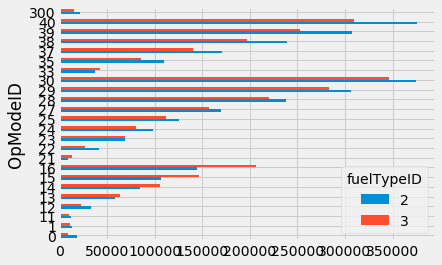

In [66]:
# some data visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
out_emission_df.plot(kind="barh")
plt.show()

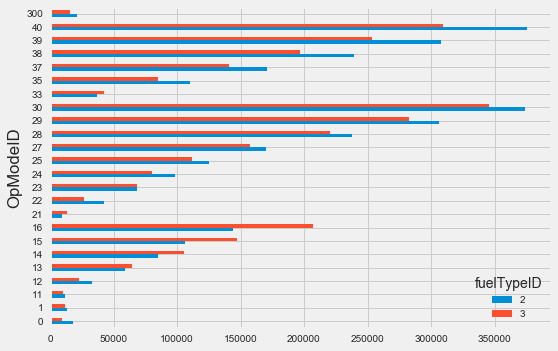

In [68]:
#don't worry about the layout! try this
import seaborn as sns
plt.style.use('fivethirtyeight')
out_emission_df.plot(kind="barh")
plt.show()

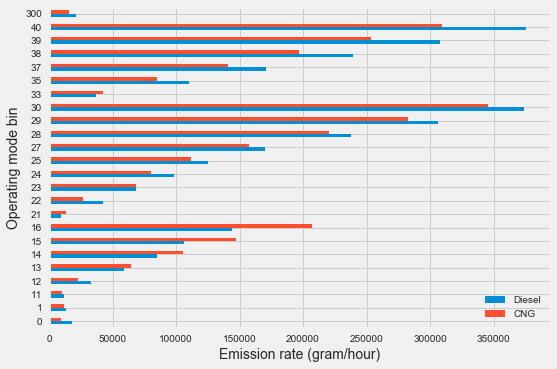

In [72]:
# want some decoration, here you are:
out_emission_df.plot(kind="barh")
plt.legend(['Diesel','CNG'])
plt.xlabel('Emission rate (gram/hour)', fontsize = 14)
plt.ylabel('Operating mode bin',fontsize=14)
plt.show()

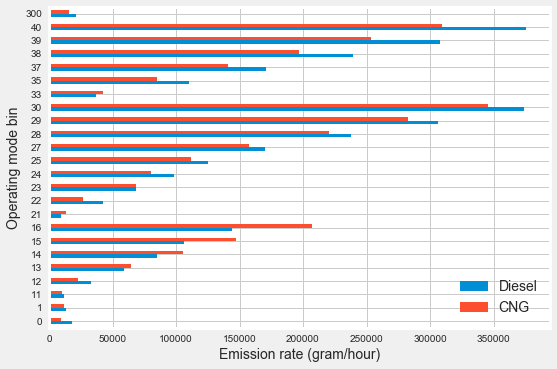

In [89]:
#change plot face color
plt.rcParams['axes.facecolor'] = 'white'
out_emission_df.plot(kind="barh")
plt.legend(['Diesel','CNG'], fontsize = 14)
plt.xlabel('Emission rate (gram/hour)', fontsize = 14)
plt.ylabel('Operating mode bin',fontsize=14)
plt.show()

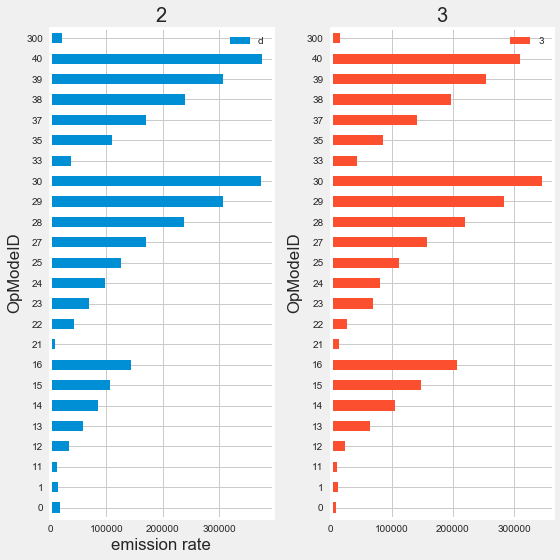

In [94]:
# split plots? sure!
ax = out_emission_df.plot(kind='barh',subplots=True, layout=(1, 2), figsize=(8, 8), sharex=False)
# change label for one plot
ax[0][0].set_xlabel('emission rate')
ax[0][0].legend('d')
plt.tight_layout()
plt.show()

In [95]:
# plot error bar, assume error = 0.05 * value
error = out_emission_df * 0.05
print error

fuelTypeID            2           3
OpModeID                           
0             909.62500    477.1180
1             679.92975    572.7135
11            592.27500    499.9375
12           1668.05000   1148.8800
13           2943.43000   3211.6250
14           4242.92500   5287.5000
15           5328.50000   7351.1500
16           7217.75000  10341.7500
21            472.61400    657.4650
22           2107.78000   1334.6850
23           3424.34500   3435.6450
24           4899.94500   4024.7350
25           6265.75000   5603.5500
27           8499.85000   7861.4500
28          11899.85000  11006.0000
29          15299.75000  14150.6000
30          18699.70000  17295.1500
33           1855.57000   2133.1700
35           5516.65000   4266.2550
37           8541.75000   7034.0500
38          11958.45000   9847.6000
39          15375.10000  12661.2000
40          18791.80000  15474.8500
300          1065.01000    773.2050


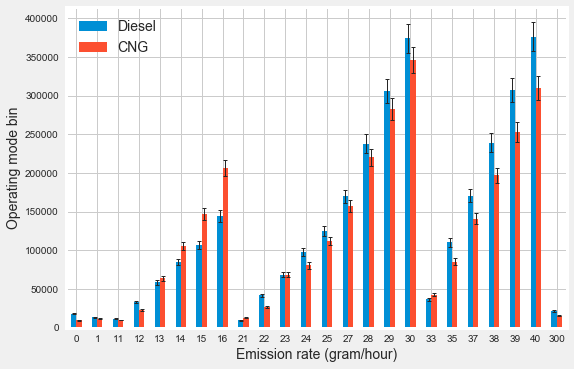

In [110]:
out_emission_df.plot.bar(yerr=error, error_kw=dict(lw=1, capsize=2, capthick=1))
plt.legend(['Diesel','CNG'], fontsize = 14)
plt.xlabel('Emission rate (gram/hour)', fontsize = 14)
plt.ylabel('Operating mode bin',fontsize=14)
plt.xticks(rotation=0)
plt.show()